# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

1.   Os dados estão adequados para o Scikitlearn.


2.   The data is suitable for Scikitlearn.


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston.shape

(506, 14)

In [6]:
boston = boston.drop_duplicates()
boston.shape

(506, 14)

In [7]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [8]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


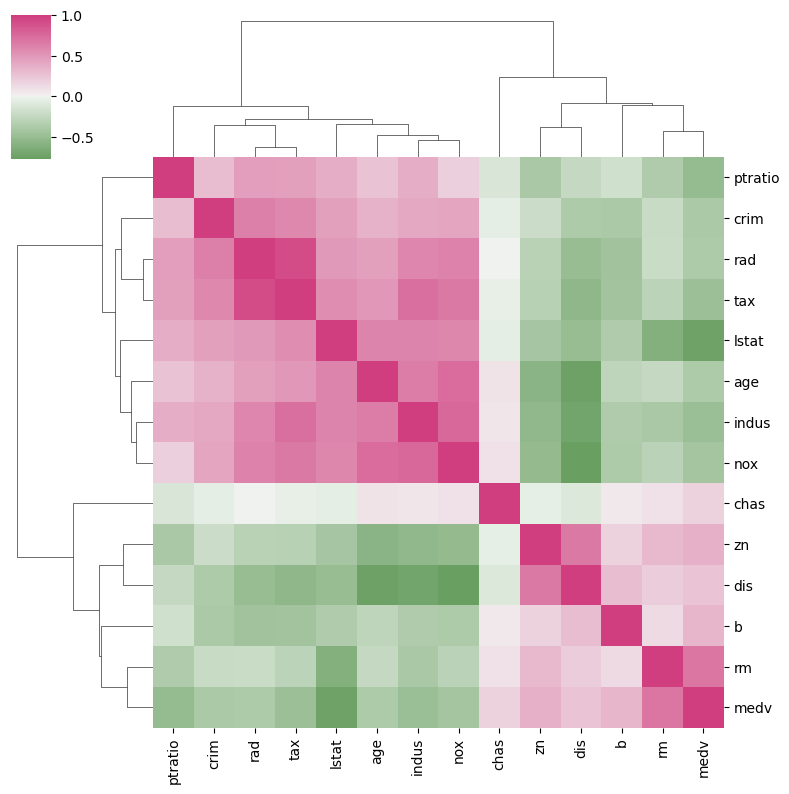

In [9]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')

sns.clustermap(boston.corr(), figsize=(8, 8), center = 0, cmap=cmap)

### 3. Separe os dados em validação e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
clf_8depth = DecisionTreeRegressor(max_depth=8, random_state=100)
clf_2depth = DecisionTreeRegressor(max_depth=2, random_state=100)

clf_8depth.fit(X_train,y_train)
clf_2depth.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=100)

### 5. Calcule o R² de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [12]:
r8 = clf_8depth.score(X_train, y_train)
r2 = clf_2depth.score(X_train, y_train)

r8_t = clf_8depth.score(X_test, y_test)
r2_t = clf_2depth.score(X_test, y_test)

template = "Para o valor de árvore de treino com profundidade = {0}, o R² é : {1:.2f}"
template_1 = "Para o valor de árvore de teste com profundidade = {0}, o R² é : {1:.2f}"

print(template.format(clf_8depth.get_depth(), r8))
print(template.format(clf_2depth.get_depth(), r2))
print(template_1.format(clf_8depth.get_depth(), r8_t))
print(template_1.format(clf_2depth.get_depth(), r2_t))

Para o valor de árvore de treino com profundidade = 8, o R² é : 0.98
Para o valor de árvore de treino com profundidade = 2, o R² é : 0.73
Para o valor de árvore de teste com profundidade = 8, o R² é : 0.72
Para o valor de árvore de teste com profundidade = 2, o R² é : 0.61


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

1. -  O valor de R² mede o quão bem um modelo de regressão se ajusta aos dados, indicando a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Os valores de R² variam de 0 a 1. Um valor de R² mais alto indica que uma maior proporção da variância na variável dependente é explicada pelas variáveis independentes, sugerindo um melhor ajuste do modelo aos dados. Portanto, o melhor valor de R² entre os resultados fornecidos é:
Para a profundidade da árvore = 8.




2. -  The R² value measures how well a regression model fits the data by indicating the proportion of the variance in the dependent variable that is predictable from the independent variables. R² values range between 0 and 1. A higher R² value signifies that a larger proportion of the variance in the dependent variable is explained by the independent variables, suggesting a better fit of the model to the data. Therefore, the best R² value among the provided results is:
For the tree depth = 8.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

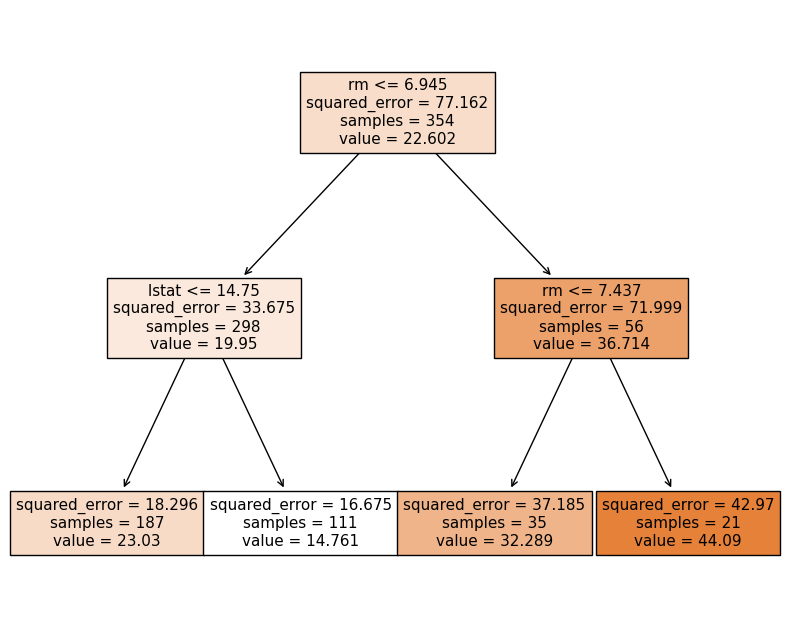

In [13]:
plt.rc('figure', figsize=(10, 8))
tp = tree.plot_tree(clf_2depth, 
                    feature_names=X.columns,  
                    filled=True) 

1. -  A variável 'rm' é mais relevante.


2. -  The variable 'rm' is more relevant.




